## Library imports

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# from pandas_profiling import ProfileReport
#import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler , OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.decomposition as skde
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, GridSearchCV

%matplotlib inline

## Understanding the data

In [2]:
df = pd.read_csv('stircom.csv')
df.head()

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

In [4]:
df.describe()


,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,5.066200e+04,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,5.502871e+07,40.979373,13.991210,3.005093,15.768525,2.713217,42.644408,0.640283
std,2.598596e+07,10.919324,30.899163,1.409003,8.347083,3.052227,102.238078,2.358029
min,1.000073e+07,18.000000,-80.190000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,3.249964e+07,32.000000,0.820000,2.000000,8.000000,1.000000,-1.000000,0.000000
50%,5.501127e+07,39.000000,4.720000,3.000000,16.000000,2.000000,-1.000000,0.000000
75%,7.748809e+07,48.000000,14.950000,4.000000,21.000000,3.000000,-1.000000,0.000000
max,9.999952e+07,95.000000,984.170000,5.000000,31.000000,63.000000,871.000000,275.000000


In [5]:
# Data dimension
df.shape

(50662, 20)

In [6]:
# Null counts
df.isnull().sum()

ID                                           0
town                                         0
country                                      0
age                                          0
job                                          0
married                                      0
education                                    0
arrears                                      0
current_balance                              0
housing                                      0
has_tv_package                               0
last_contact                                 0
conn_tr                                      0
last_contact_this_campaign_day               0
last_contact_this_campaign_month             0
this_campaign                                0
days_since_last_contact_previous_campaign    0
contacted_during_previous_campaign           0
outcome_previous_campaign                    0
new_contract_this_campaign                   0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# Checking for uniqueness of 
df.country.value_counts()

UK          50657
France          2
Germany         1
USA             1
Portugal        1
Name: country, dtype: int64

<AxesSubplot:>

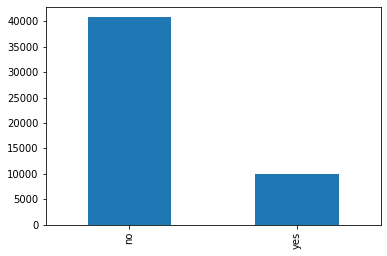

In [9]:
# Checking for Class imbalance
df.new_contract_this_campaign.value_counts().plot(kind='bar')

# The data shows class imbalance with more no than yes. When modeling, this will be taken into consideration

In [10]:
class_count = df['new_contract_this_campaign'].value_counts()
print(class_count)

no     40763
yes     9899
Name: new_contract_this_campaign, dtype: int64


In [11]:
no_count = (df[['new_contract_this_campaign']]=='no').sum()
yes_count = (df[['new_contract_this_campaign']]=='yes').sum()

print(no_count), print(yes_count)

new_contract_this_campaign    40763
dtype: int64
new_contract_this_campaign    9899
dtype: int64


(None, None)

In [12]:
# Calculating percentage of each class
total_count = no_count + yes_count

print("Percentage of yes classes: %.2f%%" % ((yes_count/total_count) *100))
print("Percentage of no classes: %.2f%%" % ((no_count/total_count) *100))

Percentage of yes classes: 19.54%
Percentage of no classes: 80.46%


### Data profiling

### Data Visualization

In [13]:
# drop ID, country, conn_tr
df_new = df.copy()
df_new.drop(['ID','country','conn_tr'], axis=1, inplace=True)
df_new.head()

,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,39,management,married,tertiary,no,-1.90,no,yes,unknown,11,jun,8,-1,0,unknown,yes
1,Basildon,53,housemaid,married,primary,no,3.62,no,no,cellular,28,jul,2,-1,0,unknown,yes
2,Blackburn,79,retired,divorced,primary,no,27.87,no,no,telephone,13,jul,1,377,1,success,yes
3,Oldham,43,services,single,secondary,no,5.50,yes,no,cellular,13,may,2,-1,0,unknown,no
4,Middlesbrough,35,technician,single,secondary,no,3.44,no,no,cellular,27,aug,16,-1,0,unknown,yes


In [14]:
num_cols = ['age','current_balance','last_contact_this_campaign_day','this_campaign','days_since_last_contact_previous_campaign','contacted_during_previous_campaign']
cat_cols = ['town','job','married','education','arrears','housing','has_tv_package','last_contact','last_contact_this_campaign_month','outcome_previous_campaign']


In [15]:
print(len(df_new.columns)) , print(len(num_cols)), print(len(cat_cols))

17
6
10


(None, None, None)

### Boxplot of numerical variables to determine outliers

In [16]:
df_num = df_new.filter(['age','current_balance','last_contact_this_campaign_day','this_campaign','days_since_last_contact_previous_campaign','contacted_during_previous_campaign'],axis=1).copy()
df_cat = df_new.filter(['town','job','married','education','arrears','housing','has_tv_package','last_contact','last_contact_this_campaign_month','outcome_previous_campaign'],axis=1).copy()

# def box_plot(df_num,col):
#     for col in df_num.columns:
#         fig = px.box(df_num, col)
#         fig.show()
        
# box_plot(df_num, df_num.columns)

## Plot of columns againt the label column 

* The aim of this is to get an understaing of each column compared to label and if they will be good in predicting the label

### Plot of numerical variables against the label


### Treating of outliers. 

* This will make use of clip properties  of data frame to set all values below 25th percentile to 25th and likewise for the 90th percentile

In [17]:
df_num = df_num.clip(lower=df_num.quantile(0.05), upper = df_num.quantile(0.90), axis=1)

### Performing Standard Scaler

In [18]:
df_num.head()

,age,current_balance,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
0,39,-1.49,11,5,-1,0
1,53,3.62,28,2,-1,0
2,56,27.87,13,1,187,1
3,43,5.50,13,2,-1,0
4,35,3.44,27,5,-1,0


In [19]:
df_num.describe()

,age,current_balance,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,40.456437,9.942657,15.662410,2.265584,30.173542,0.332083
std,9.477336,12.096474,8.025547,1.385914,65.894966,0.699339
min,26.000000,-1.490000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,0.820000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,4.720000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,14.950000,21.000000,3.000000,-1.000000,0.000000
max,56.000000,36.580000,28.000000,5.000000,187.000000,2.000000


In [20]:
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)
# Features[:, 0:10]
df_num.head()

,age,current_balance,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
0,-0.153677,-0.945132,-0.580952,1.973025,-0.473084,-0.474858
1,1.323546,-0.522691,1.537305,-0.191633,-0.473084,-0.474858
2,1.640094,1.482045,-0.331745,-0.913185,2.379969,0.955078
3,0.268386,-0.367272,-0.331745,-0.191633,-0.473084,-0.474858
4,-0.575741,-0.537572,1.412701,1.973025,-0.473084,-0.474858


In [21]:
le = LabelEncoder()
for col in df_cat.columns:
    df_cat[col] = le.fit_transform(df_cat[col])

In [22]:
# df_cat = pd.get_dummies(df_cat, columns = df_cat.columns)
df_cat.head()

,town,job,married,education,arrears,housing,has_tv_package,last_contact,last_contact_this_campaign_month,outcome_previous_campaign
0,15,4,1,2,0,0,2,3,7,3
1,2,3,1,0,0,0,1,1,6,3
2,9,5,0,0,0,0,1,2,6,2
3,62,7,2,1,0,1,1,1,9,3
4,54,9,2,1,0,0,1,1,1,3


In [23]:
df_cat['outcome_previous_campaign'].value_counts()

3    40614
0     5498
2     2406
1     2144
Name: outcome_previous_campaign, dtype: int64

In [24]:
df_cat.shape

(50662, 10)

In [25]:
df_num.shape

(50662, 6)

In [26]:
Features = pd.concat([df_cat,df_num], join='outer', axis=1)
label = df.filter(['new_contract_this_campaign'])
print(Features.shape)
print(label.shape)

(50662, 16)
(50662, 1)


In [27]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features), columns = Features.columns)
# Features[:, 0:10]
Features.head()

,town,job,married,education,arrears,housing,has_tv_package,last_contact,last_contact_this_campaign_month,outcome_previous_campaign,age,current_balance,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
0,-1.141491,-0.113881,-0.28712,1.020059,-0.13203,-1.078857,2.348441,1.574527,0.220321,0.461409,-0.153677,-0.945132,-0.580952,1.973025,-0.473084,-0.474858
1,-1.606911,-0.420163,-0.28712,-1.655352,-0.13203,-1.078857,-0.425168,-0.688158,-0.070588,0.461409,1.323546,-0.522691,1.537305,-0.191633,-0.473084,-0.474858
2,-1.356300,0.192401,-1.91803,-1.655352,-0.13203,-1.078857,-0.425168,0.443185,-0.070588,-0.546694,1.640094,1.482045,-0.331745,-0.913185,2.379969,0.955078
3,0.541180,0.804965,1.34379,-0.317646,-0.13203,0.926907,-0.425168,-0.688158,0.802141,0.461409,0.268386,-0.367272,-0.331745,-0.191633,-0.473084,-0.474858
4,0.254768,1.417529,1.34379,-0.317646,-0.13203,-1.078857,-0.425168,-0.688158,-1.525137,0.461409,-0.575741,-0.537572,1.412701,1.973025,-0.473084,-0.474858


In [28]:
X = Features
X.shape

(50662, 16)

In [31]:
label['new_contract_this_campaign'] = label['new_contract_this_campaign'].replace(['yes','no'], [1,0])
label.head()

,new_contract_this_campaign
0,1
1,1
2,1
3,0
4,1


In [32]:
y = label
y.shape

(50662, 1)

In [33]:
# Randomly split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## Feature importance selection methods

Methods 1: Scree Plot

In [34]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(X_train)
pca_comps

PCA()

In [ ]:
Features.head()

#### Mtehod 2: Extra Trees

In [ ]:
model = ExtraTreesClassifier()
model.fit(Features, label)

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_,index=Features.columns)

In [ ]:
feat_importances.reset_index(inplace=True)

#### Method 3: Random Forest

### Dimension reduction with PCA

In [44]:
pca_choose = skde.PCA(n_components = 15)
pca_choose.fit(X_train)
Comps = pca_choose.transform(X_train) # Comps is the transformed X_train we will use to train the model
Comps.shape

(35463, 15)

In [ ]:
y_train.shape , X_train.shape

## Comparing models

1. Extra Trees Classifier

In [ ]:
et = ExtraTreesClassifier(class_weight = "balanced") # balanced class weight will handle the class imbalance
# Choosing the best parameter for the classifier
param_grid = {"max_features":[5,10, 15,18,20], "min_samples_leaf":[3,5,10,20]}
inside = KFold(n_splits=10, shuffle=True, random_state=0)
#outside = KFold(n_splits=10, shuffle=True)

et = GridSearchCV(estimator = et, param_grid = param_grid, 
                        cv = inside,
                        scoring = 'roc_auc',
                        return_train_score=True)
et.fit(X_train,y_train)
print(et.best_score_)
print(et.best_estimator_.min_samples_leaf) 
print(et.best_params_)


In [45]:
# Build the model after choosing the optimal parameters
ET =ExtraTreesClassifier(max_features=15, min_samples_leaf=3)
ET.fit(Comps, y_train) #(X_train, y_train)

ExtraTreesClassifier(max_features=15, min_samples_leaf=3)

In [46]:
# Prediction
y_pred = ET.predict(pca_choose.transform(X_test)) #(X_test)
print(y_test, y_pred)

       new_contract_this_campaign
30544                           0
38784                           0
9029                            1
913                             0
22424                           0
...                           ...
4566                            1
14282                           1
46824                           0
28226                           0
38137                           0

[15199 rows x 1 columns] [0 0 1 ... 0 0 0]


In [47]:
# Accuracy report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.24%


In [48]:
# Results of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[11912   298]
 [ 1641  1348]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     12210
           1       0.82      0.45      0.58      2989

    accuracy                           0.87     15199
   macro avg       0.85      0.71      0.75     15199
weighted avg       0.87      0.87      0.86     15199



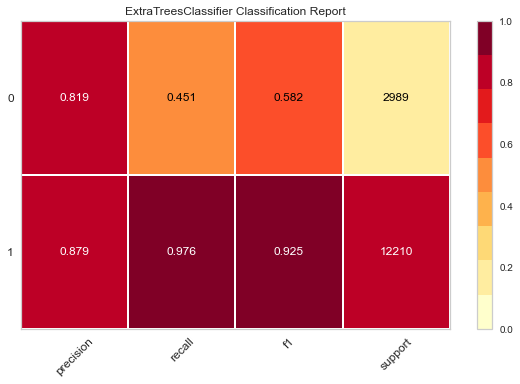

<AxesSubplot:title={'center':'ExtraTreesClassifier Classification Report'}>

In [52]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
classes = [1,0]
visualizer = ClassificationReport(ET,classes=classes, support=True)
visualizer.fit(Comps, y_train) #(X_train, y_train)
visualizer.score(pca_choose.transform(X_test), y_test) #(X_test, y_test)
visualizer.show()

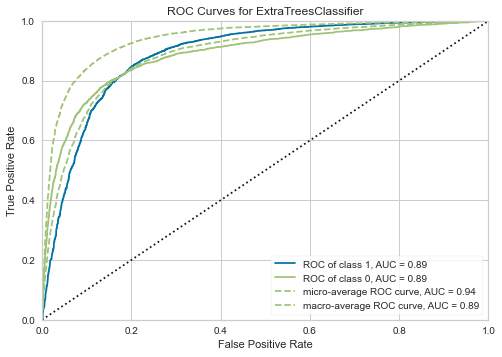

<AxesSubplot:title={'center':'ROC Curves for ExtraTreesClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
visualizer = ROCAUC(ET, classes=classes)
visualizer.fit(Comps, y_train) #(X_train, y_train)
visualizer.score(pca_choose.transform(X_test), y_test) #(X_test, y_test)
visualizer.show()

#### 2. Logistic Regression with cost-sensitibe classification

* Choose a class imbalance
* determine the best parameter for C


In [55]:
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import linear_model

# Estimating the best estimator for the regularization parameter C
logistic_mod = linear_model.LogisticRegression(class_weight = "balanced", solver='liblinear')
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle=True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle=True)
nr.seed(3456)
param_grid = {"C": [0.1, 1, 10, 100]}
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid,
                     cv = inside,
                     scoring = 'roc_auc',
                     return_train_score = True)
clf.fit(X_train, y_train)
clf.best_estimator_.C # The best regularization parameter for "C" is 0.1

0.1

In [56]:
logistic_mod = linear_model.LogisticRegression(C=0.1, class_weight = "balanced", solver='liblinear')
logistic_mod.fit(Comps, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.22550625]
[[ 0.26449226  0.3704484  -0.00875917 -0.24705867  0.20995019 -0.03992789
   0.00459476  0.04680542  0.25341153 -0.12711197 -0.04576773  0.07101622
   0.3231694  -0.01731314  0.9220268 ]]


In [58]:
y_pred = logistic_mod.predict(pca_choose.transform(X_test)) #(X_test)
print(y_test, y_pred)

       new_contract_this_campaign
30544                           0
38784                           0
9029                            1
913                             0
22424                           0
...                           ...
4566                            1
14282                           1
46824                           0
28226                           0
38137                           0

[15199 rows x 1 columns] [0 0 1 ... 0 0 0]


In [59]:
# Accuracy report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.27%


In [60]:
# Results of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[8256 3954]
 [1020 1969]]


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     12210
           1       0.33      0.66      0.44      2989

    accuracy                           0.67     15199
   macro avg       0.61      0.67      0.61     15199
weighted avg       0.78      0.67      0.70     15199



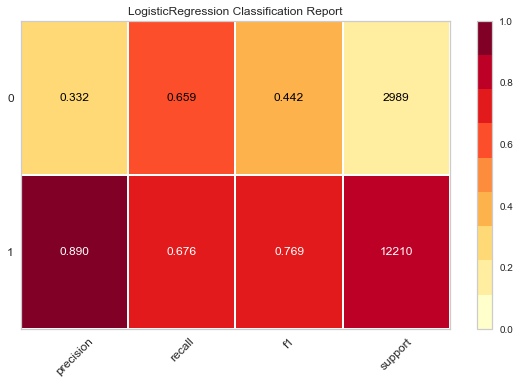

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [62]:
visualizer = ClassificationReport(logistic_mod,classes=classes, support=True)
visualizer.fit(Comps, y_train) #(X_train, y_train)
visualizer.score(pca_choose.transform(X_test), y_test) #(X_test, y_test)
visualizer.show()

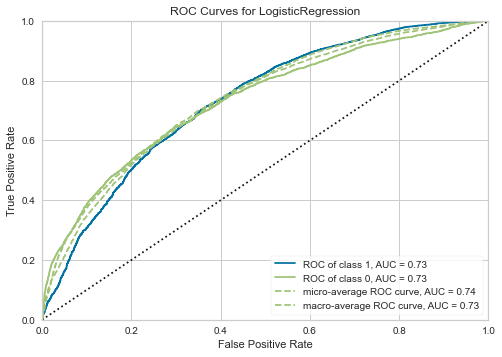

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
visualizer = ROCAUC(logistic_mod, classes=classes)
visualizer.fit(Comps, y_train) #(X_train, y_train)
visualizer.score(pca_choose.transform(X_test), y_test) #(X_test, y_test)
visualizer.show()

In [64]:
## Matthews Correlation coefficient
from sklearn.metrics import matthews_corrcoef


mcc = matthews_corrcoef(y_test, y_pred) 
mcc

0.27296390182982766

#### 3: Keras

In [68]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [73]:
def create_baseline():
    model = Sequential()
    model.add(Dense(60, input_dim=15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimzer='adam', metrics='accuracy')
    return model

In [75]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, Features, label, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: nan% (nan%)


In [78]:
import tensorflow as tf
m = Sequential([
    keras.layers.Flatten(input_shape=(15,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])

m.compile(optimizer='adam',
         loss='binary_crossentropy', metrics=['accuracy'])
m.fit(Comps, y_train, epochs=50, batch_size=1)
test_loss, test_acc =m.evaluate(pca_choose.transform(X_test), y_test)
print('Test accuracy: ', test_loss, test_acc)

Epoch 1/50
35463/35463 [==============================] - 20s 565us/step - loss: 0.4337 - accuracy: 0.8229
Epoch 2/50
35463/35463 [==============================] - 21s 592us/step - loss: 0.4246 - accuracy: 0.8277
Epoch 3/50
35463/35463 [==============================] - 21s 588us/step - loss: 0.4206 - accuracy: 0.8284
Epoch 4/50
35463/35463 [==============================] - 22s 633us/step - loss: 0.4182 - accuracy: 0.8298
Epoch 5/50
35463/35463 [==============================] - 23s 655us/step - loss: 0.4173 - accuracy: 0.8292
Epoch 6/50
35463/35463 [==============================] - 23s 649us/step - loss: 0.4157 - accuracy: 0.8311
Epoch 7/50
35463/35463 [==============================] - 23s 648us/step - loss: 0.4142 - accuracy: 0.8307
Epoch 8/50
35463/35463 [==============================] - 21s 587us/step - loss: 0.4137 - accuracy: 0.8312
Epoch 9/50
35463/35463 [==============================] - 24s 680us/step - loss: 0.4127 - accuracy: 0.8315
Epoch 10/50
35463/35463 [============

In [79]:
y_pred = m.predict(pca_choose.transform(X_test)) #(X_test)
print(y_test, y_pred)

       new_contract_this_campaign
30544                           0
38784                           0
9029                            1
913                             0
22424                           0
...                           ...
4566                            1
14282                           1
46824                           0
28226                           0
38137                           0

[15199 rows x 1 columns] [[0.10100952]
 [0.05610985]
 [0.28152218]
 ...
 [0.08499274]
 [0.04856768]
 [0.1607177 ]]


In [81]:
import tensorflow as tf
mm = Sequential([
    keras.layers.Flatten(input_shape=(15,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])

mm.compile(optimizer='adam',
         loss='binary_crossentropy', metrics=['accuracy'])
mm.fit(Comps, y_train, epochs=70, batch_size=5)
test_loss, test_acc =mm.evaluate(pca_choose.transform(X_test), y_test)
print('Test accuracy: ', test_acc)

Epoch 1/70
7093/7093 [==============================] - 25s 3ms/step - loss: 0.4373 - accuracy: 0.8185
Epoch 2/70
7093/7093 [==============================] - 25s 4ms/step - loss: 0.4231 - accuracy: 0.8268
Epoch 3/70
7093/7093 [==============================] - 14s 2ms/step - loss: 0.4199 - accuracy: 0.8276
Epoch 4/70
7093/7093 [==============================] - 12s 2ms/step - loss: 0.4178 - accuracy: 0.8295
Epoch 5/70
7093/7093 [==============================] - 14s 2ms/step - loss: 0.4159 - accuracy: 0.8291
Epoch 6/70
7093/7093 [==============================] - 15s 2ms/step - loss: 0.4148 - accuracy: 0.8301
Epoch 7/70
7093/7093 [==============================] - 14s 2ms/step - loss: 0.4137 - accuracy: 0.8295
Epoch 8/70
7093/7093 [==============================] - 16s 2ms/step - loss: 0.4129 - accuracy: 0.8300
Epoch 9/70
7093/7093 [==============================] - 20s 3ms/step - loss: 0.4121 - accuracy: 0.8305
Epoch 10/70
7093/7093 [==============================] - 21s 3ms/step - l

In [82]:
import tensorflow as tf
mmm = Sequential([
    keras.layers.Flatten(input_shape=(15,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])

mmm.compile(optimizer='adam',
         loss='binary_crossentropy', metrics=['accuracy'])
mmm.fit(Comps, y_train, epochs=50, batch_size=5)
test_loss, test_acc =mmm.evaluate(pca_choose.transform(X_test), y_test)
print('Test accuracy: ', test_acc)

Epoch 1/50
7093/7093 [==============================] - 15s 2ms/step - loss: 0.4386 - accuracy: 0.8192
Epoch 2/50
7093/7093 [==============================] - 16s 2ms/step - loss: 0.4231 - accuracy: 0.8283
Epoch 3/50
7093/7093 [==============================] - 15s 2ms/step - loss: 0.4190 - accuracy: 0.8305
Epoch 4/50
7093/7093 [==============================] - 14s 2ms/step - loss: 0.4167 - accuracy: 0.8306
Epoch 5/50
7093/7093 [==============================] - 14s 2ms/step - loss: 0.4149 - accuracy: 0.8315
Epoch 6/50
7093/7093 [==============================] - 13s 2ms/step - loss: 0.4134 - accuracy: 0.8315
Epoch 7/50
7093/7093 [==============================] - 14s 2ms/step - loss: 0.4127 - accuracy: 0.8308
Epoch 8/50
7093/7093 [==============================] - 15s 2ms/step - loss: 0.4111 - accuracy: 0.8311
Epoch 9/50
7093/7093 [==============================] - 15s 2ms/step - loss: 0.4103 - accuracy: 0.8315
Epoch 10/50
7093/7093 [==============================] - 14s 2ms/step - l

In [84]:
test_loss, test_acc =mmm.evaluate(pca_choose.transform(X_test), y_test)
print('Test accuracy: ', test_loss, test_acc)

475/475 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8238
Test accuracy:  0.41812294721603394 0.8238041996955872
